#  Implementing a Simple LLM-Powered Chatbot Using LangGraph

In this tutorial, we will design a **simple chatbot** called **SuperBot** using the **LangGraph framework**. This chatbot leverages **Large Language Models (LLMs)** like OpenAI GPT or Groq open-source models.

---

## 1️⃣ Overview

The chatbot workflow:



[Start] --> [SuperBot Node: LLM Powered] --> [End]


**Key Concepts:**
- **Nodes:** Represent tasks (Python functions).
- **Edges:** Define the flow between nodes.
- **Conditional Edges:** Decide path based on logic.
- **State:** Stores information shared between nodes.
- **Reducers:** Append or update state values (like chat messages).
- **State Graph:** Represents the entire structure of the graph.

---

## 2️⃣ Setup

### Import Libraries

```

In [22]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
import os


In [23]:
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")


# 3️⃣ Define State Schema

We define a state class to store chat messages:

  - messages is a list that stores all conversation messages.
  - add_messages ensures messages append rather than overwrite previous messages.
  - Annotated labels each message as human or AI.

In [24]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 4️⃣ Load LLM Models

In [25]:
# from langchain.chat_models import ChatOpenAI

# chat_openai = ChatOpenAI(model_name="gpt-4")
# response = chat_openai.invoke("Good morning!")


In [26]:
pip install langchain_groq


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from langchain_groq import ChatGroq
chat_groq = ChatGroq(model_name = "Gemma2-9b-It")
response =  chat_groq.invoke("Good moring, Time To stat my day")

 

# 5️⃣ Define SuperBot Node

In [ ]:

def Superbot(State:State):
    user_message = State['messages'][-1].content
    ai_response = chat_groq.invoke(user_message)
    return{"messages":[ai_response]}
    

   - Node returns messages in key-value form.
   - Reducer ensures all messages are tracked and appended.

# 6️⃣ Build the Graph

In [36]:
graph = StateGraph(State)
graph.add_node("Superbot", Superbot)
graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)
graph_builder = graph.compile()



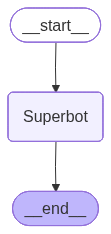

In [37]:
## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

# 7️⃣ Invoke the Chatbot

- Input messages are annotated as human messages.
- LLM generates AI response and appends it to messages.

In [31]:
graph_builder.invoke({
    "messages":[{"role":"user", "content":"good mornig,i just woke up"}]
})

{'messages': [HumanMessage(content='good mornig,i just woke up', additional_kwargs={}, response_metadata={}, id='22b557cf-71ab-4c4f-b266-981d1b093ad4'),
  AIMessage(content='Good morning! ☀️  \n\nI hope you had a restful sleep. What are your plans for today? 😊 \n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 17, 'total_tokens': 45, 'completion_time': 0.050909091, 'prompt_time': 0.00125507, 'queue_time': 0.255002289, 'total_time': 0.052164161}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--b4d1b90f-10c8-4410-861a-283b2c089dc1-0', usage_metadata={'input_tokens': 17, 'output_tokens': 28, 'total_tokens': 45})]}

# 8️⃣ Streaming Responses

In [32]:
stream = graph_builder.stream({
    "messages": [{ "role":"user", "content":"Time to plan my morning routine"}]


})

In [33]:
for event in stream:
    print(event)

{'Superbot': {'messages': [AIMessage(content="Let's craft the perfect morning routine for you!  To make sure it's tailored just right, tell me:\n\n**1. What time do you need to wake up?**\n**2. What are your goals for your morning routine?** (e.g., be more productive, feel more energized, have time for relaxation, practice mindfulness, etc.)\n**3. What do you already enjoy doing in the morning?**\n**4. What are your biggest morning challenges?** (e.g., hitting snooze, feeling groggy, rushing out the door)\n**5. How much time do you realistically have each morning?**\n\n\nOnce I have this information, I can suggest a personalized routine that works for you! \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 159, 'prompt_tokens': 15, 'total_tokens': 174, 'completion_time': 0.289090909, 'prompt_time': 0.00128562, 'queue_time': 0.248638541, 'total_time': 0.290376529}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_

- Default mode: Updates only the latest message.
- Stream mode = "values": Shows all messages including human and AI responses.
- Allows real-time message streaming.